

# Assignment 5

### 黄士诚

### 3160103847

### 序号：1


#### 一、画心形曲线

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

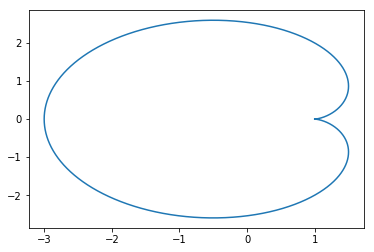

In [4]:
X = []
Y = []
def print_heart():
    a=np.arange(0.00, 2*np.pi, 0.001)
    for t in a:
        X.append(2*np.cos(t) - np.cos(2*t))
        Y.append(2*np.sin(t) - np.sin(2*t))
    plt.plot(X,Y)
    plt.show()
print_heart()


#### 二、MC方法计算面积以及分析   
###### 法一：利用y的已知值求x的两个交点判断是否在区域内

In [7]:
n = 10000
import sympy as sym
a, b = sym.symbols('a,b', positive=True)
y = 2*sym.sqrt(1-b**2)*(1-b)
sym.simplify(sym.diff(y, b))

2*(2*b**2 - b - 1)/sqrt(-b**2 + 1)

sym.simplify(sym.diff(y,b,2))

利用二分法和牛顿法求根（求x的两个交点）

In [8]:
def bisection_root(z1, z2, err, tol, sim, y):
    while (True):
        f1 = func (z1, sim, y)
        if np.abs(f1) < tol:
            return z1
        z = (z1 + z2) * 0.5
        fz = func (z, sim, y)
        if np.abs(fz) < tol:
            return z
        if fz * f1 < 0:
            z2 = z
        else:
            z1 = z
        z = (z1 + z2) * 0.5
        if (np.abs(z1 - z2) < err):
            return z
        
def func(b,sim,y):
    return sim*2*np.sqrt(1-b**2)*(1-b)-y

def dfunc(b,sim):
    return sim*2*(2*b**2 - b - 1)/np.sqrt(-b**2 + 1)

def Newton(tol, MAX_IT, sim, theta,y):
    theta0 = theta
    err = np.abs(func(theta0,sim,y))
    k = 0
    while err > tol :
        theta1 = theta0 - func(theta0,sim,y) / dfunc(theta0, sim)
        theta0 = theta1
        err = np.abs(func(theta0,sim,y))
        k = k + 1
        if k > MAX_IT:
            print ("Disconvergence!")
            theta0 = -100
            break

    return theta0


In [9]:
def find_mm(y):
    theta = 0
    sim = 1 if y >= 0 else -1 
    b1 = bisection_root(-1/2, 1, 1e-10, 1e-15, sim, y)
    b2 = bisection_root(-1,-1/2, 1e-10, 1e-15, sim, y)
   # b1 = Newton(1e-15, 10, sim, b1, y)
   # b2 = Newton(1e-15, 10, sim, b2, y)
    if b2 > 1 or b1 < -1 or b1 == -100 or b2 == -100:
        return None,None
    x1 = 2*b1 + 1 - 2*b1**2
    x2 = 2*b2 + 1 - 2*b2**2
    ma,mi = (x1,x2) if x1>x2 else (x2,x1)
    return mi,ma
    

def MC_area(times):
    sin = []
    cos = []
    for x,y in zip(X,Y):
        sin = (3 - 5*x + x**2 + x**3 + y**2 + x*y**2)/(4*y)
        cos = 1/4*(5 - x**2 - y**2)
        # 以防求错
        # assert sin**2 + cos**2 == 1
    
    
    # 开始取样
    inside = 0
    # -3 到 3的二元均匀分布
    dots = np.random.rand(2, times)*6
    for i in range(times):
        x = dots[0, i] - 3
        y = dots[1, i] - 3
        if np.abs(y) < 3/2*np.sqrt(3):
            xmin, xmax = find_mm(y)
            if x >= xmin and x <= xmax:
                inside += 1 
    return inside/times*36
MC_area(n)

F:\ana36\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


18.7992

可以看到这个估计值还是不错的，真实值是6pi

###### 法二：利用x,y的方程直接判断是否在区域内

In [86]:
from numpy.random import uniform
n = 100000
def MC_area2(times): 
    # 开始取样
    inside = 0
    # -3 到 3的二元均匀分布
    dots = np.random.rand(2, times)*6
    for i in range(times):
        #x = dots[0, i] - 3
        #y = dots[1, i] - 3
        x = uniform(-3,3)
        y = uniform(-3,3)
        if (((x-1)**2+y**2+(x-1)*2) - 2*np.sqrt((x-1)**2 + y**2))<=0:
            inside += 1
    return inside/times*36
MC_area2(n)

18.83628

#### 三、利用几种方法估计误差(sigma = 0.95)
###### 法一：切比雪夫

In [25]:
sigma = 0.99
err = np.sqrt(1/(4*n*sigma))
err 

0.00502518907629606

###### 法二：中心极限定理

In [26]:
def inv_normal(y):
    c0 = 2.515517
    c1 = 0.802853
    c2 = 0.010328
    d1 = 1.432788
    d2 = 0.189269
    d3 = 0.001308
    t = np.sqrt(-np.log((min(y, 1 - y))**2))
    S1 = c0 + c1 * t + c2 * t**2
    S2 = 1 + d1 * t + d2 * t**2 + d3 * t**3
    S = t - S1 / S2
    w = y - 0.5
    if (w >= 0):
        F = S
    else:
        F = -S
    return F
err2 = inv_normal(1 - sigma/2) / np.sqrt(2 * n)
err2

8.836810878193302e-05

###### 法三：其他定理

In [27]:
err3 = np.sqrt(np.log(2/sigma)/(2*n))
err3

0.005929576360978273

惊讶地发现这个估计比大数定律高

##### 法四：真实误差的均值

In [91]:
trueerror_e = np.abs((sum(mc)-100*6*np.pi)/100)
print("真实误差均值",trueerror_e)

真实误差均值 169.71016407846153


解释：观察这个真实的均值和3个估计的大小，  
发现中心极限定理小了一个数量级，其他两个大了一个数量级。。

#### 四、求置信区间（sigma = 0.99)
###### 法一：用pearson法

In [87]:
sigma = 0.01
from scipy.stats import f
x = MC_area2(n)*n/36
ma = 1/(1+(n-x+1)/(x*f.isf(sigma/2, 2*x, 2*(n-x+1))))
mi = 1/(1+(n-x)/((x+1)*f.isf(1-sigma/2, 2*x+2, 2*(n-x))))
(mi*36,ma*36)

(18.68204001630823, 18.974601317234647)

##### 法二：用切比雪夫法

In [88]:
beta = inv_normal(1 - sigma/2)
S = MC_area2(n)*n/36
mi =(S+beta**2/2+beta*(-1)*np.sqrt(beta**2/4+S*(n-S)/n))/(n+beta**2)
ma = (S+beta**2/2+beta*(+1)*np.sqrt(beta**2/4+S*(n-S)/n))/(n+beta**2)
(mi*36,ma*36)

(18.738721617204902, 19.031640883971388)

##### 法三：渔民法

In [21]:
xbar = MC_area(n)/36
d = lambda eps,mu:(eps+mu)*np.log(mu/(mu+eps))+(1-mu-eps)*np.log((1-mu)/(1-mu-eps))
print("需要解一个蛮复杂的方程...")

F:\ana36\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


需要解一个蛮复杂的方程...


画实际频率图，对比求到的置信区间

F:\ana36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


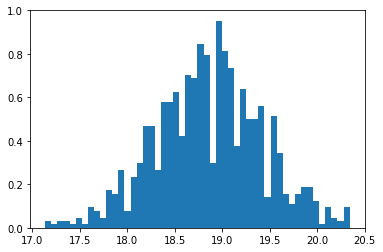

In [90]:
T = 1000
n = 1000
mc = np.zeros(T)
for i in range(T):
    mc[i] = (MC_area2(n))
plt.hist(mc, bins=50, normed=True, label="Stat. of the Sampling");

这个图是100个点的频率图

In [84]:
real = 6*np.pi
mc1 = list(map(lambda x:np.abs(x-real),mc))
ran = np.argsort((mc1))
chosen = []
us = 0
for i in range(100):
    if us >= 0.99:
        break
    us += mc[ran[i]]/100
    chosen.append(ran[i])
    
chosen1 = [mc[i]  for i in range(len(chosen))]
#plt.hist(mc, bins=50, normed=True, label="Stat. of the Sampling");
print(chosen1)

[18.802799999999998, 18.9648, 19.022399999999998, 18.802799999999998, 18.7704, 19.0116]


输出的囊括概率为99的数，可以看到，真实的置信区间  
大概是(18.80,19.02)，比预估的要小了很多

In [ ]:
real = 
p = real/36
def real_district(sigma=0.01, m=10000, tol=0.01)
    width = 10/tol
    inside = np.zeros(width+1)
    retur = 0
    from tqdm import tqdm
    for i in tqdm(range(m)):
        f[i] = comb(m,i)*p**i*(1 - p)**(m - i)
        inside[np.abs()]
    

In [26]:

def MC_district(sigma=0.01, m=10000, tol=0.01):
    width = 10/tol
    inside = np.zeros(width+1)
    retur = 0
    from tqdm import tqdm
    for i in tqdm(range(m)):
        inside[np.abs(MC_area(times)-real)/tol] += 1
    for i in tqdm(range(width)):
        retur += inside/m 
        if retur>=0.99:
            return i*tol

        
    
    
    
    

SyntaxError: unexpected EOF while parsing (<ipython-input-26-a3682689a749>, line 1)